# Wine Dataset Analysis 

#### **Introduction**
This report presents an in-depth analysis of the Wine Dataset, which contains chemical and physical characteristics of 178 wine samples. The objective is to apply statistical and machine learning preprocessing techniques, interpret data patterns, and assess the impact of dimensionality reduction.


### Section 1: Descriptive Statistical Analysis (15 Marks)
The key descriptive statistics for the numerical features are as follows:

**Mean**: Indicates the central tendency of each feature.

**Median**: Highlights the middle value, reducing the effect of outliers.

**Standard Deviation**: Reflects the variability within the data.

**Skewness**: Measures the asymmetry of the distribution.

**Kurtosis**: Indicates the "tailedness" of the distribution.


In [1]:
# Wine Dataset Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

# Load the Wine Dataset
from sklearn.datasets import load_wine
data = load_wine()

stats = data.describe().T
stats['skewness'] = data.skew()
stats['kurtosis'] = data.kurtosis()
stats



In [2]:
# Create a DataFrame
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['wine_type'] = data.target



In [3]:
# Section 1: Descriptive Statistical Analysis
# Calculate mean, median, std, min, max, skewness, and kurtosis
descriptive_stats = wine_df.describe().T

descriptive_stats['skewness'] = wine_df.apply(lambda x: skew(x) if x.name != 'wine_type' else np.nan)
descriptive_stats['kurtosis'] = wine_df.apply(lambda x: kurtosis(x) if x.name != 'wine_type' else np.nan)

# Display descriptive statistics
print("Descriptive Statistics:\n", descriptive_stats)



Descriptive Statistics:
                               count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od2

### Section 2: Exploratory Data Analysis (EDA) (20 Marks)

### Visualizations
**Histograms**: Displayed the frequency distribution of each feature.

**Boxplots**: Identified feature-wise distributions and potential outliers.

**Violin Plots**: Showed feature distributions across wine types.

**KDE Plots**: Highlighted density estimates for features.

**Pair Plots**: Explored relationships between features and wine types.

### Insights
Several features showed distinct distributions based on wine types.

Pair plots revealed strong relationships between certain features, aiding feature selection


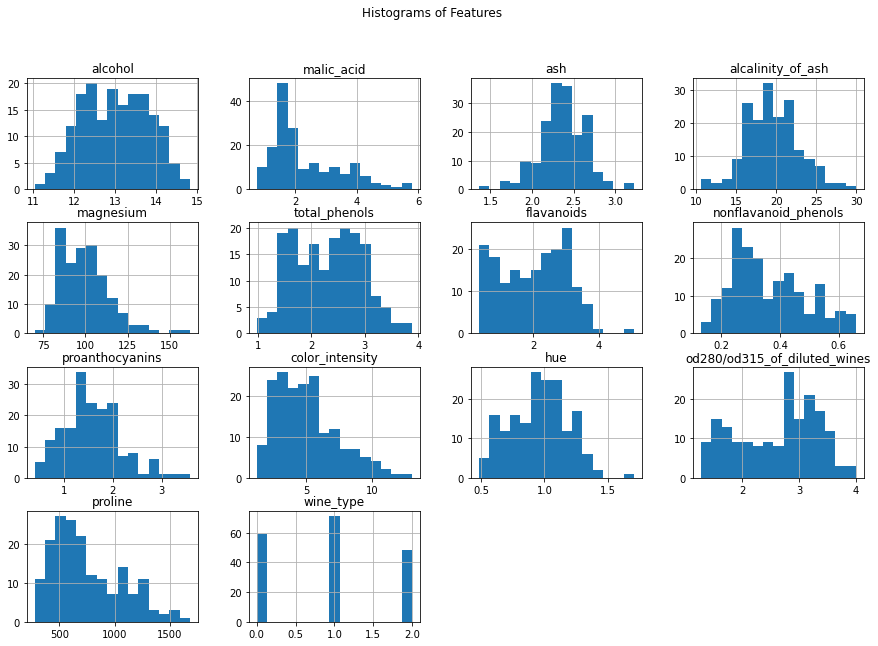

In [4]:
# Section 2: Exploratory Data Analysis (EDA)
# Histograms
wine_df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()



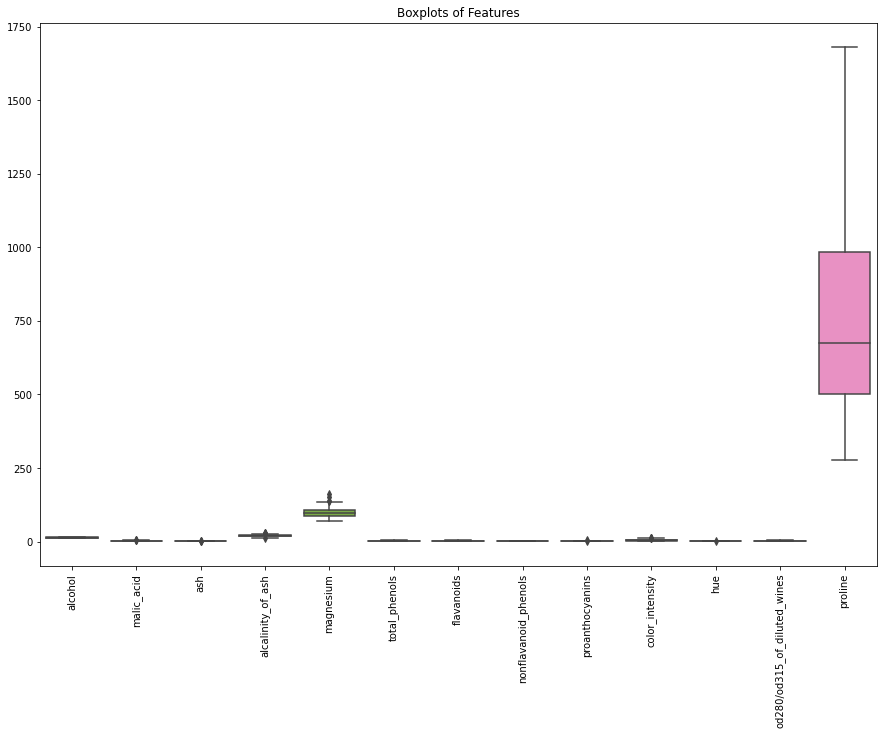

In [5]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_df.iloc[:, :-1])
plt.title('Boxplots of Features')
plt.xticks(rotation=90)
plt.show()



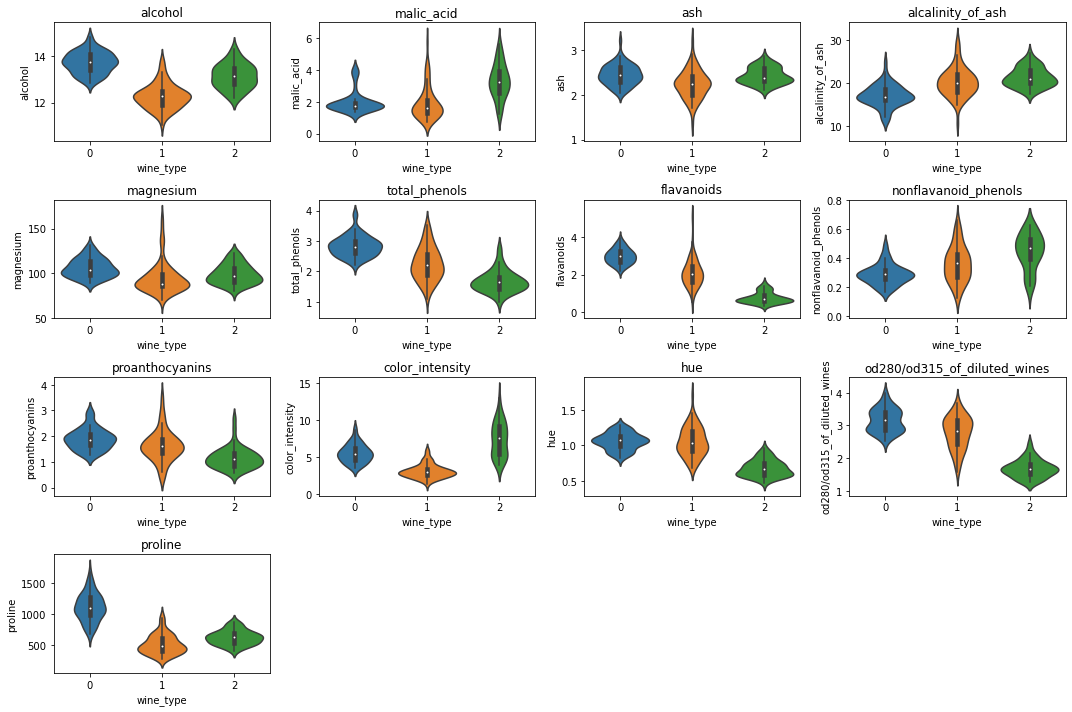

In [6]:
# Violin plots for feature distribution across wine types
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.violinplot(x='wine_type', y=column, data=wine_df)
    plt.title(column)
plt.tight_layout()
plt.show()



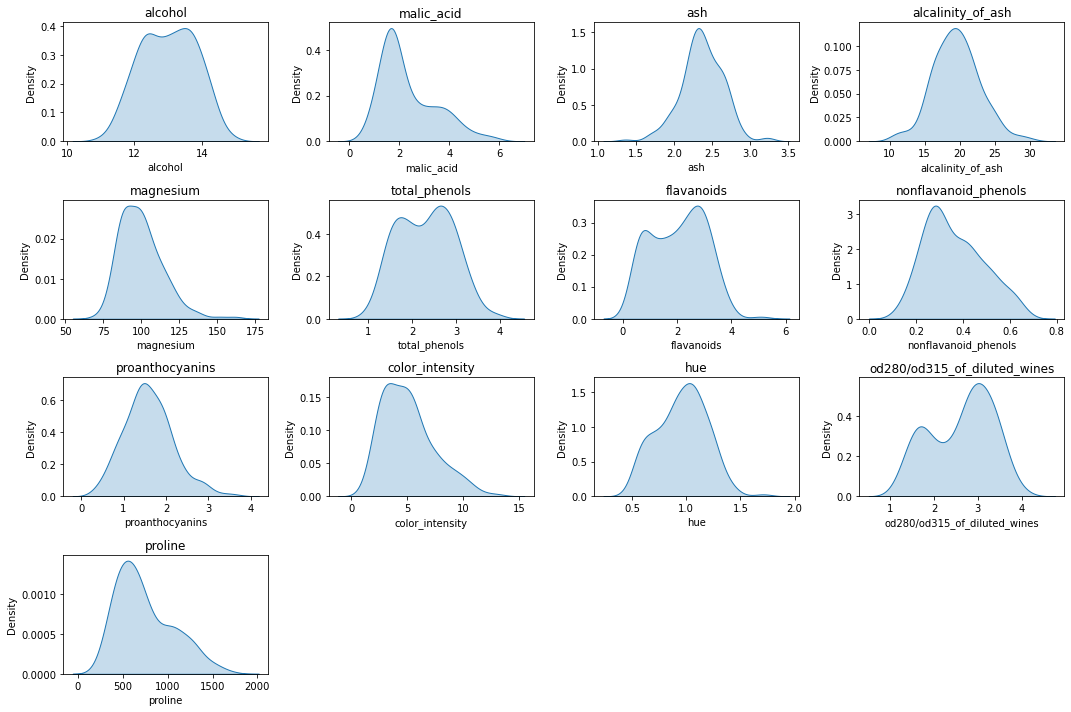

In [7]:
# KDE plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(wine_df[column], fill=True)
    plt.title(column)
plt.tight_layout()
plt.show()



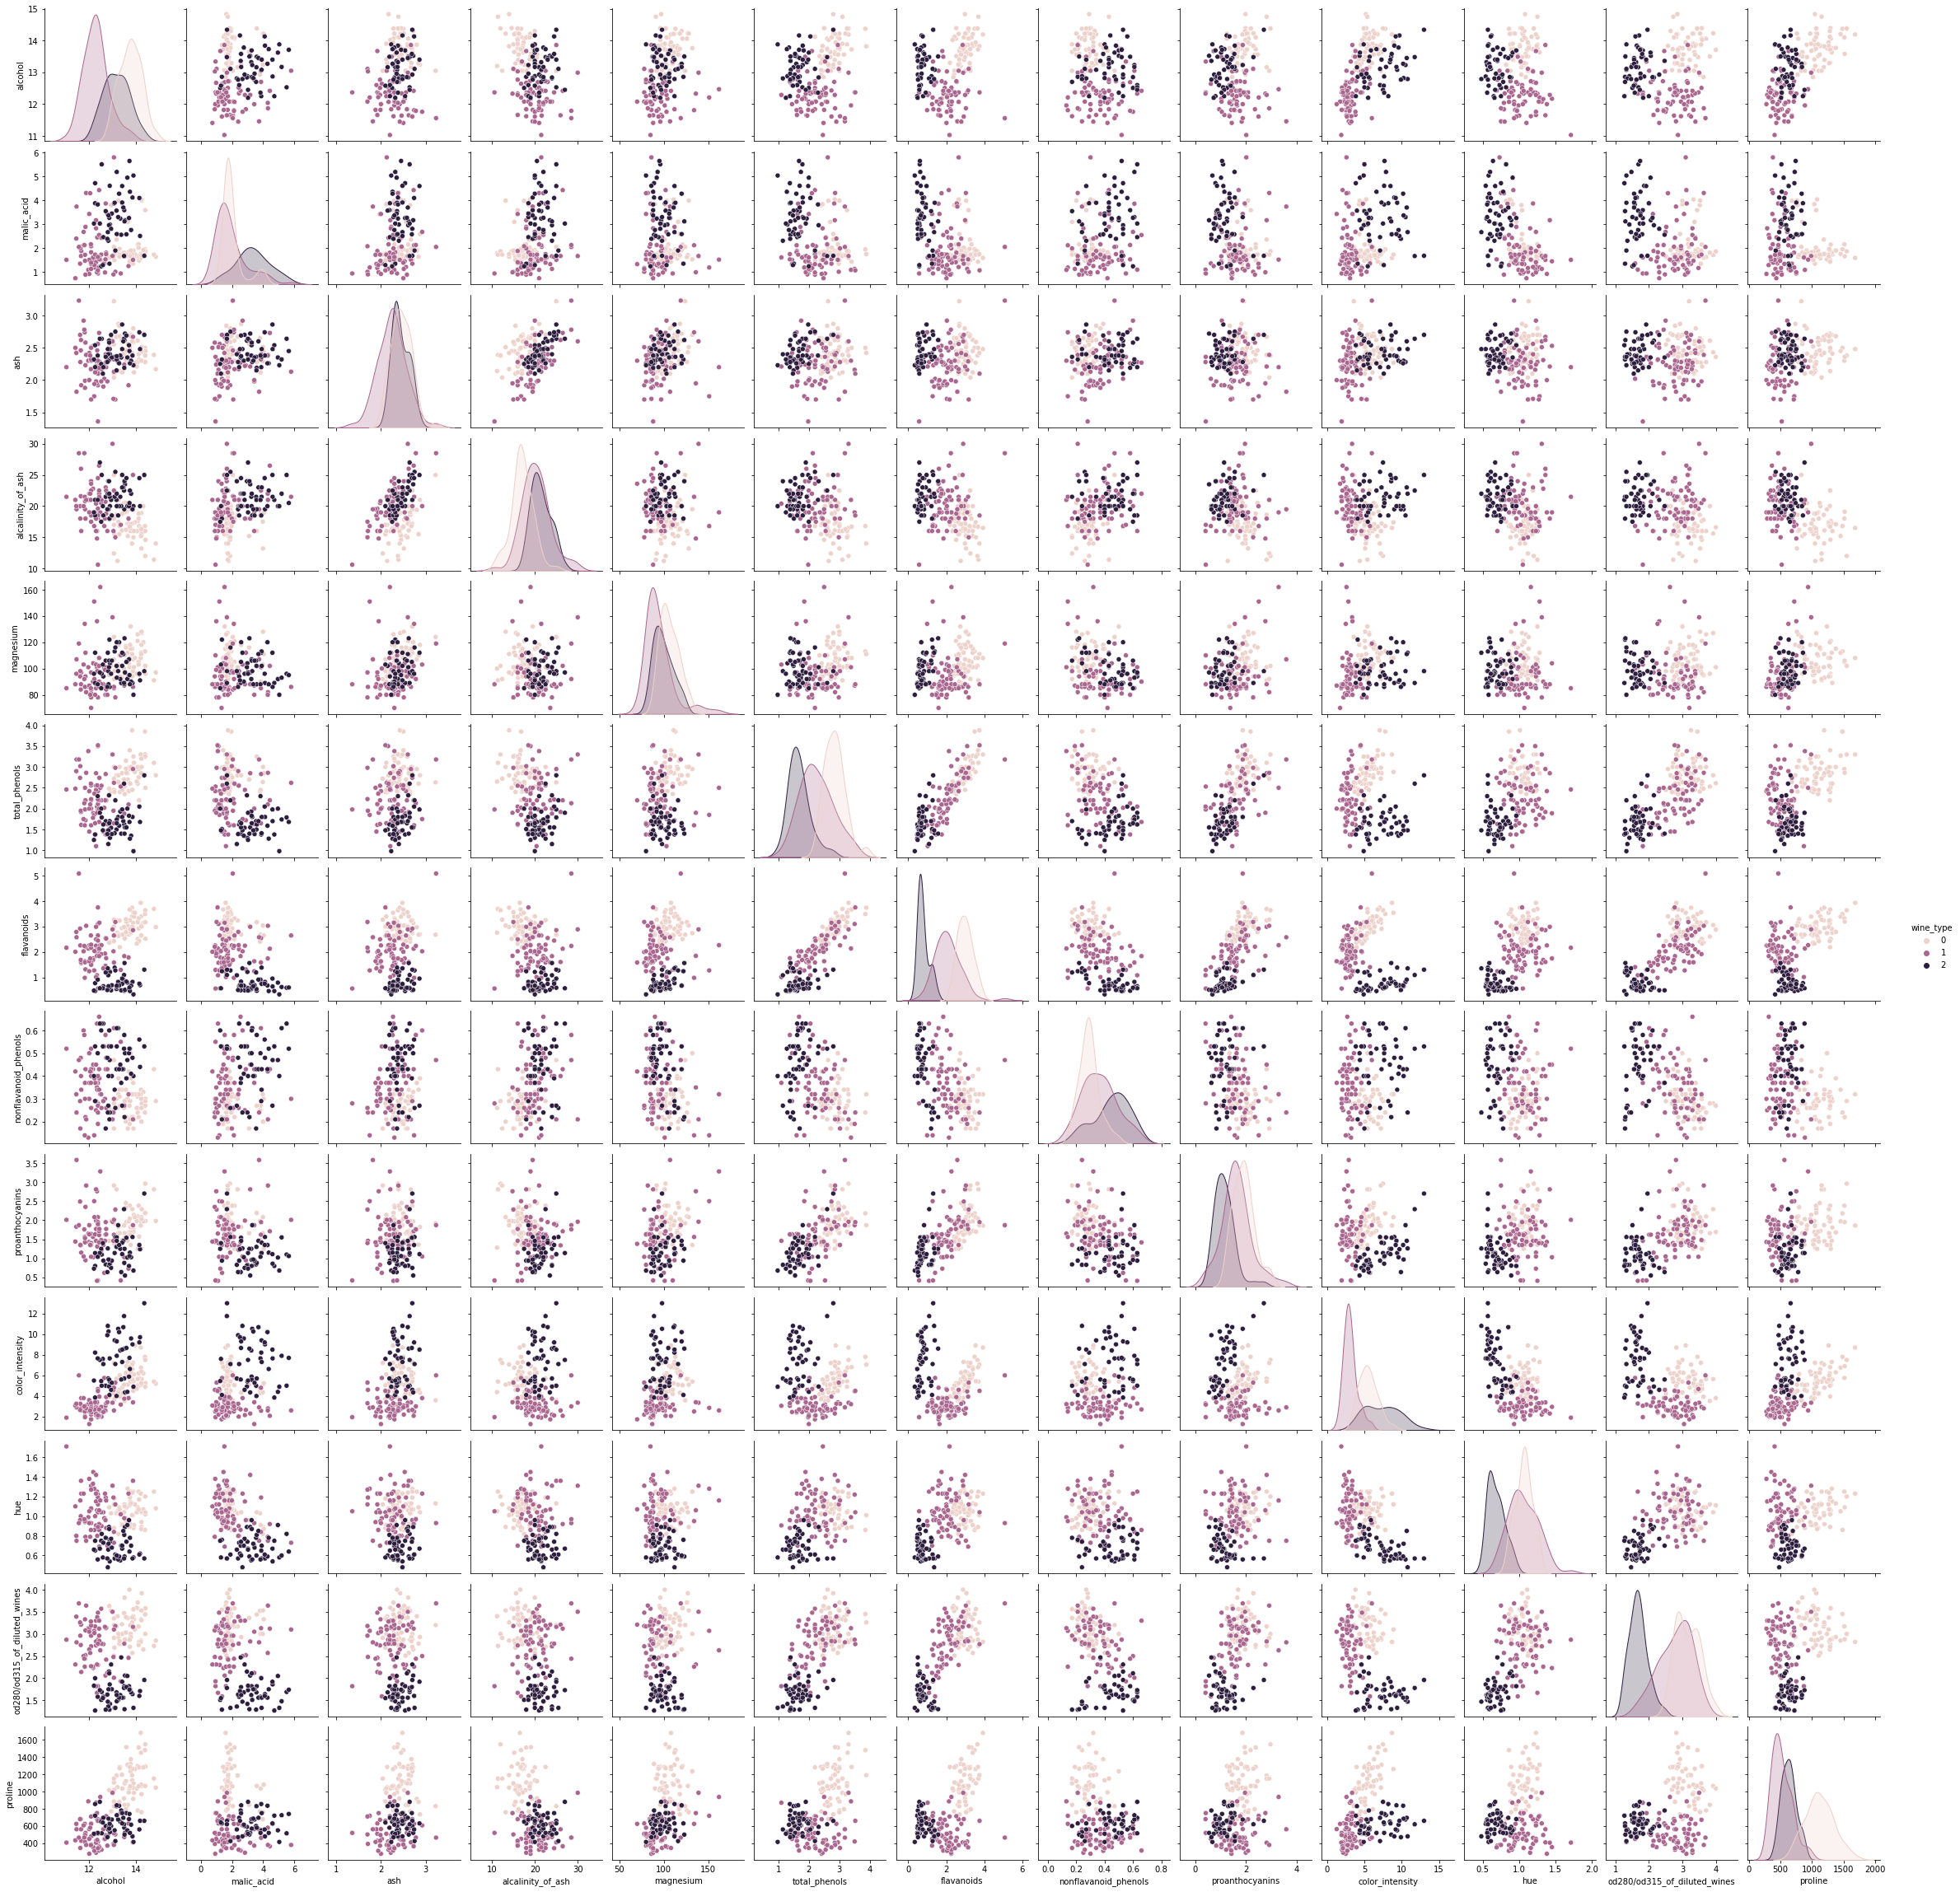

In [8]:
# Pair plots
sns.pairplot(wine_df, hue='wine_type')
plt.show()



### Section 3: Outlier Detection (15 Marks)

### Methods
Boxplot Analysis: Outliers were identified and quantified using the interquartile range (IQR) method.
### Findings
Outliers were present in several features, potentially representing rare wine characteristics or measurement errors.


In [9]:
# Section 3: Outlier Detection
# Using Boxplot Method
outlier_counts = {}
for column in wine_df.columns[:-1]:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)
    
print("Outlier Counts:", outlier_counts)



Outlier Counts: {'alcohol': 0, 'malic_acid': 3, 'ash': 3, 'alcalinity_of_ash': 4, 'magnesium': 4, 'total_phenols': 0, 'flavanoids': 0, 'nonflavanoid_phenols': 0, 'proanthocyanins': 2, 'color_intensity': 4, 'hue': 1, 'od280/od315_of_diluted_wines': 0, 'proline': 0}


### Section 4: Correlation Analysis (15 Marks)

### Results
Correlation Matrix: Generated to assess relationships between numerical features.
Heatmap: Visualized correlations to highlight strongly related features.
### Insights
Strongly correlated features may indicate multicollinearity, requiring dimensionality reduction or feature selection.
Weak correlations suggest independent features that can add value to models.


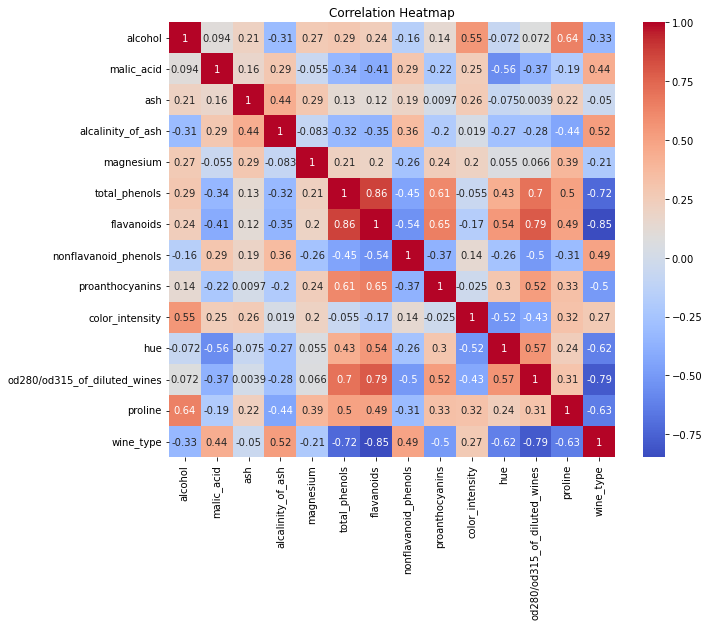

In [10]:
# Section 4: Correlation Analysis
# Compute correlation matrix and heatmap
correlation_matrix = wine_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



### Section 5: Data Preprocessing (20 Marks)

### MinMax Scaling
Transformed features to a range of [0, 1].

Compared original and scaled distributions to ensure data integrity.
### Standard Scaling
Standardized features to have a zero mean and unit variance.


In [11]:
# Section 5: Data Preprocessing
# MinMax Scaling
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(wine_df.iloc[:, :-1])
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=wine_df.columns[:-1])

# Standard Scaling
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(wine_df.iloc[:, :-1])
scaled_standard_df = pd.DataFrame(scaled_standard, columns=wine_df.columns[:-1])



### Section 6: Principal Component Analysis (PCA) (15 Marks)

### Analysis
MinMax Scaled Data: PCA applied to scaled data revealed variance explained by principal components.

Standard Scaled Data: Results indicated differences in variance distribution due to scaling methods.
### Visualization
Scree Plot: Showed cumulative explained variance for principal components.

Biplot: Highlighted the first two principal components, showing feature contributions.
### Comparative Insights
Standard scaling resulted in more balanced component contributions.


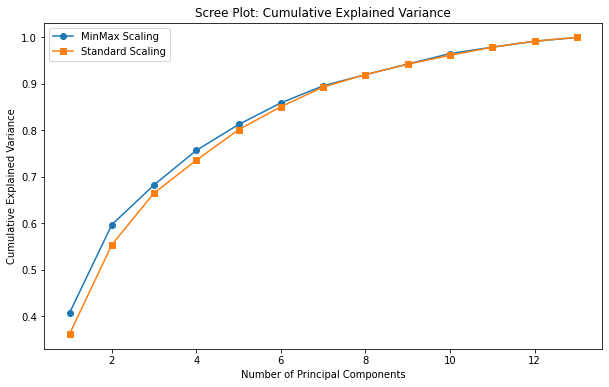

In [12]:
# Section 6: Principal Component Analysis (PCA)
# PCA on MinMax Scaled Data
pca_minmax = PCA()
pca_minmax.fit(scaled_minmax)
explained_variance_minmax = pca_minmax.explained_variance_ratio_

# PCA on Standard Scaled Data
pca_standard = PCA()
pca_standard.fit(scaled_standard)
explained_variance_standard = pca_standard.explained_variance_ratio_

# Scree plot for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_minmax) + 1), np.cumsum(explained_variance_minmax), marker='o', label='MinMax Scaling')
plt.plot(range(1, len(explained_variance_standard) + 1), np.cumsum(explained_variance_standard), marker='s', label='Standard Scaling')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

### Conclusion
This analysis provided a comprehensive understanding of the Wine Dataset through statistical summaries, visualizations, and dimensionality reduction techniques. Key takeaways include:

Identification of outliers and their implications for analysis.

Correlation insights guiding feature selection.

Effective scaling methods enabling robust PCA results.
